## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from datetime import datetime
%matplotlib inline

In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:

import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [4]:
start = datetime(2017, 1, 1)
end = datetime(2018, 12,31)
df = pdr.get_data_yahoo('AAPL',start,end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.133324,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.102955,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.240784,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.544470,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.796768,134247600


[*********************100%***********************]  1 of 1 completed


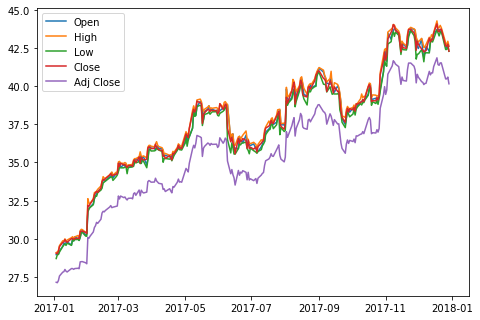

In [5]:
from pandas_datareader import data as web
from datetime import datetime

start=datetime(2017, 1, 1) 
end = datetime(2018, 1,1)
df = web.get_data_yahoo('AAPL',start=start,end=end)
f = plt.figure()
x = f.add_axes([1,1,1,1])
for i in (list(df)[:-1]):
    x.plot(df[i], label = i)
plt.legend(loc="upper left")

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

Text(0, 0.5, 'Средний рейтинг')

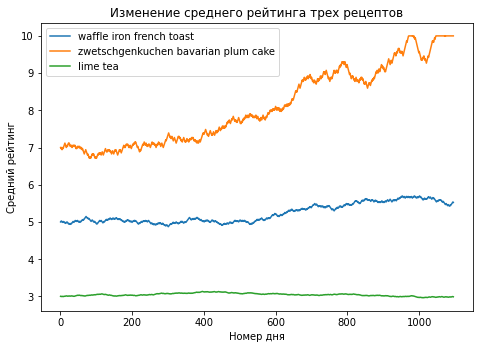

In [6]:
data = np.load('average_ratings.npy')
x = np.arange(1,data[0].shape[0]+1)
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(x, data[0], label = 'waffle iron french toast')
ax.plot(x, data[1], label = 'zwetschgenkuchen bavarian plum cake')
ax.plot(x, data[2], label = 'lime tea')
ax.legend(loc = 'upper left')
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


C:\Users\maria\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '30/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


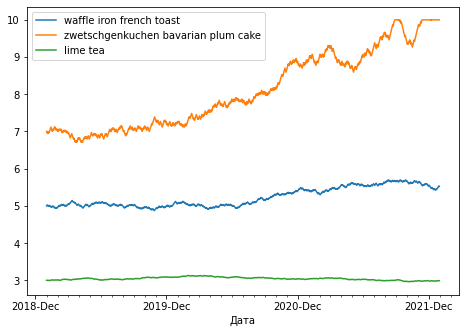

In [7]:
data = np.load('average_ratings.npy')
x = np.arange(1,data[0].shape[0]+1)
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
x = pd.date_range(start='1/1/2019', end='30/12/2021')
pd.to_datetime(x, infer_datetime_format= True)
a1,= ax.plot(x, data[0], label = 'waffle iron french toast')
a2, = ax.plot(x, data[1], label = 'zwetschgenkuchen bavarian plum cake')
a3, = ax.plot(x, data[2], label = 'lime tea')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(12)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_xlabel('Дата')
ax.legend(handles = [a1,a2,a3], loc = 'upper left')

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

Text(0, 0.5, 'Средний рейтинг')

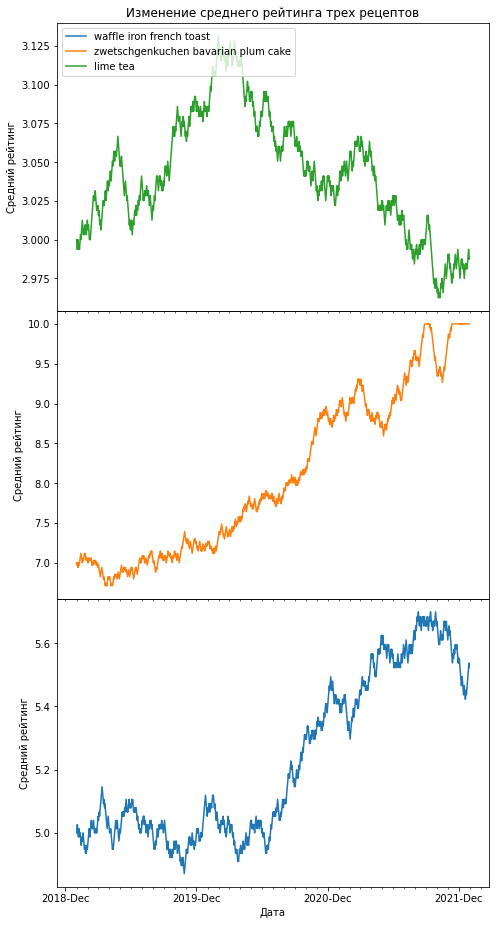

In [8]:
fig = plt.figure()
ax1 = fig.add_axes([1,1,1,1])
a1, = ax1.plot(x,data[0],'tab:blue', label = 'waffle iron french toast')
ax2 = fig.add_axes([1,2,1,1])
a2, = ax2.plot(x,data[1], 'tab:orange',label = 'zwetschgenkuchen bavarian plum cake')
ax3 = fig.add_axes([1,3,1,1])
a3, = ax3.plot(x,data[2],'tab:green', label = 'lime tea')
ax2.axes.xaxis.set_ticks([])
ax3.axes.xaxis.set_ticks([])
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax3.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(12)))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax3.legend(handles=[a1,a2,a3], loc = 'upper left')
ax3.set_title('Изменение среднего рейтинга трех рецептов')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Средний рейтинг')
ax2.set_ylabel('Средний рейтинг')
ax3.set_ylabel('Средний рейтинг')

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0.5, 0.98, 'Изменение количества пользователей в линейном и логарифмическом масштабе')

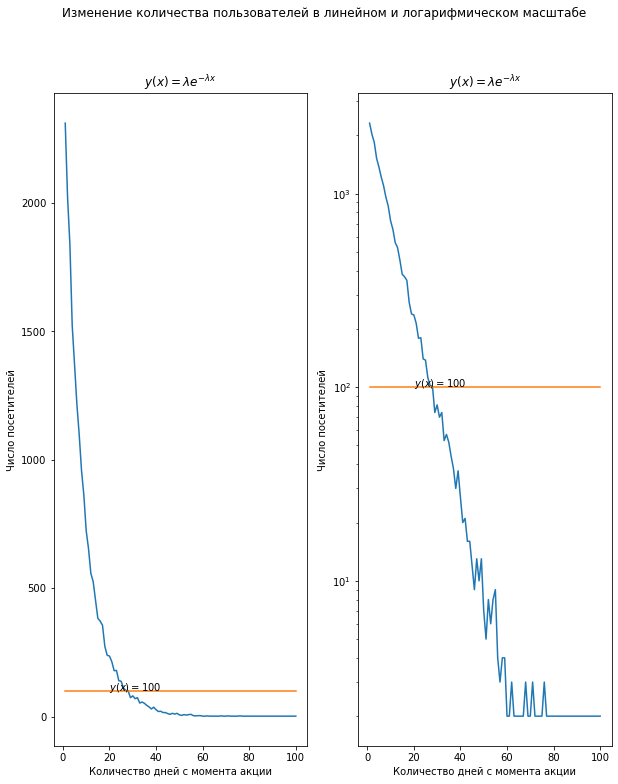

In [14]:
data1 = np.load('visitors.npy')
f4, x4 = plt.subplots(nrows=1, ncols=2, figsize=(10, 12))
for j in x4:
    j.plot(np.arange(1,data1.shape[0]+1),data1)
    j.set_title('$y(x)=\lambda e^{-\lambda x}$')
    j.plot(np.arange(1,data1.shape[0]+1),[100 for j in range(data1.shape[0])])
    j.set_xlabel('Количество дней с момента акции')
    j.set_xlabel('Количество дней с момента акции')
    j.set_ylabel('Число посетителей')
    j.text(20,100,'$y(x)=100$')
x4[1].set_yscale('log')
plt.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе")

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [123]:
reviews = pd.read_csv('reviews_sample.csv',index_col = 0, parse_dates = ['date'])
recipes = pd.read_csv('recipes_sample.csv')
reviews

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0.5, 1.0, 'Размеры групп рецептов')

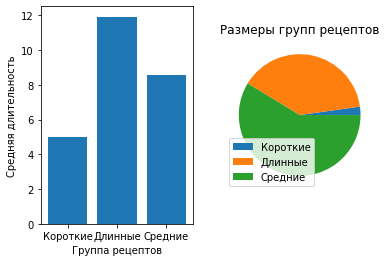

In [312]:
reviews['id'] = reviews['recipe_id']
short = pd.DataFrame(recipes[recipes['minutes']<5])
medium = pd.DataFrame(recipes[(recipes['minutes']<50) & (recipes['minutes']>=5)])
long = pd.DataFrame(recipes[recipes['minutes']>=50])
long.merge(reviews)
medium.merge(reviews)
short.merge(reviews)
long = long[long['n_steps'].isnull()==False]
medium = medium[medium['n_steps'].isnull()==False]
short = short[short['n_steps'].isnull()==False]
long_mean = long['n_steps'].mean()
medium_mean = medium['n_steps'].mean()
short_mean = short['n_steps'].mean()
count = pd.DataFrame({'Размер группы':[short.shape[0],long.shape[0],medium.shape[0]]}, index = ['Короткие', 'Длинные','Средние'])
l = pd.DataFrame({'Среднее кол-во шагов':[short_mean,long_mean,medium_mean]}, index = ['Короткие', 'Длинные','Средние'])
f5, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

count = pd.DataFrame({'Размер группы':[short.shape[0],long.shape[0],medium.shape[0]]}, index = ['Короткие', 'Длинные','Средние'])
ax1.bar(l.index,l['Среднее кол-во шагов'])
ax2.pie(count['Размер группы'])

ax1.set_xlabel('Группа рецептов')
ax2.legend(['Короткие', 'Длинные','Средние'])
ax1.set_ylabel('Средняя длительность')
ax2.set_title('Размеры групп рецептов')


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

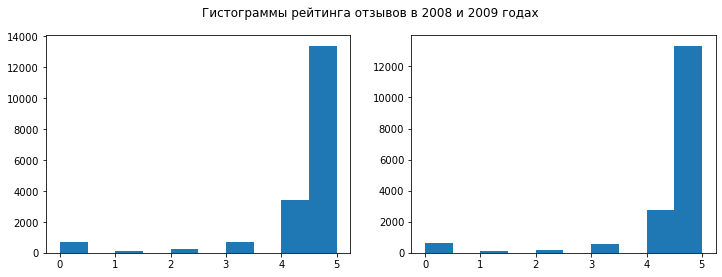

In [324]:
df6_2008 = reviews[reviews['date'].dt.year ==2008]
df6_2009 = reviews[reviews['date'].dt.year ==2009]
f6, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
ax1.hist(df6_2008['rating'])

ax2.hist(df6_2009['rating'])
plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

<AxesSubplot:>

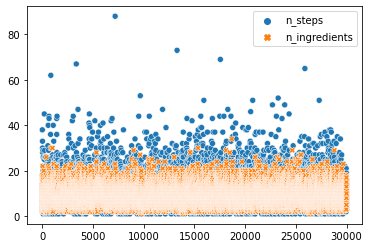

In [328]:
recipes
sns.scatterplot(data = recipes[['n_steps','n_ingredients']])

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [83]:
df

,mass,radius
Mercury,0.33,2439.7
Venus,4.87,6051.8
Earth,5.97,6378.1
